# Build and Demonstrate the Model

Import required libraries:

In [43]:
import pandas as pd  
import numpy as np  
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import LabelEncoder  
import matplotlib.pyplot as plt  
import seaborn as sns  


Download and load the dataset using pandas:

In [44]:
df = pd.read_csv("Rotten_Tomatoes_Movies3.csv")  
print(df.head())  


                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus rating  \
0  Though it may seem like just another Harry Pot...     PG   
1  Nicole Holofcener's newest might seem slight i...      R   
2                                                NaN      R   
3  Sidney Lumet's feature debut is a superbly wri...     NR   
4  One of D

Check for missing values and data types:

In [45]:
print(df.info())  
print(df.isnull().sum())  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   movie_info          16614 non-null  object 
 2   critics_consensus   8309 non-null   object 
 3   rating              16638 non-null  object 
 4   genre               16621 non-null  object 
 5   directors           16524 non-null  object 
 6   writers             15289 non-null  object 
 7   cast                16354 non-null  object 
 8   in_theaters_date    15823 non-null  object 
 9   on_streaming_date   16636 non-null  object 
 10  runtime_in_minutes  16483 non-null  float64
 11  studio_name         16222 non-null  object 
 12  tomatometer_status  16638 non-null  object 
 13  tomatometer_rating  16638 non-null  int64  
 14  tomatometer_count   16638 non-null  int64  
 15  audience_rating     16386 non-null  float64
dtypes: f

Visualize the relationship between features and audience_rating.

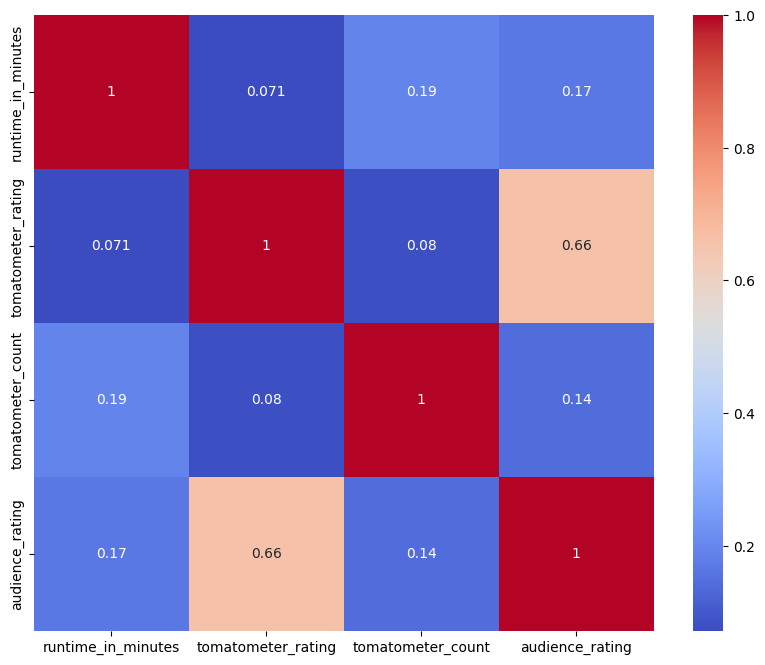

In [46]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

##  Data Preprocessing

    Handle missing values (drop or impute).

    Encode categorical features using LabelEncoder or OneHotEncoder.

In [47]:
print(df.columns)
df = df.dropna(subset=['audience_rating'])

Index(['movie_title', 'movie_info', 'critics_consensus', 'rating', 'genre',
       'directors', 'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_rating'],
      dtype='object')


In [59]:
le = LabelEncoder()

# Assuming 'movie_title' and 'genre' are categorical columns
df['movie_title'] = le.fit_transform(df['movie_title'])
df['genre'] = le.fit_transform(df['genre'])
df['directors'] = le.fit_transform(df['directors']) 


Separate features (X) and target (y):

In [56]:
X = df.drop(['audience_rating'], axis=1)
y = df['audience_rating']

Split the data into training and testing sets:

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

Use a regression model like RandomForestRegressor

In [58]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'An intense international thriller, NO ESCAPE centers on an American businessman (Wilson) as he and his family settle into their new home in Southeast Asia. Suddenly finding themselves in the middle of a violent political uprising, they must frantically look for a safe escape as rebels mercilessly attack the city. Directed by John Erick Dowdle and written together with his brother Drew, NO ESCAPE stars Owen Wilson, Pierce Brosnan and Lake Bell. (C) Weinstein'